In [3]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
You should consider upgrading via the 'c:\Users\frend\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Partie 1 - Manipulations de base avec OpenCV


**Import libreries**

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

**Charger une image**

In [9]:
image=cv.imread('image_chat2.jfif')

In [7]:
cv.imshow('img',image)

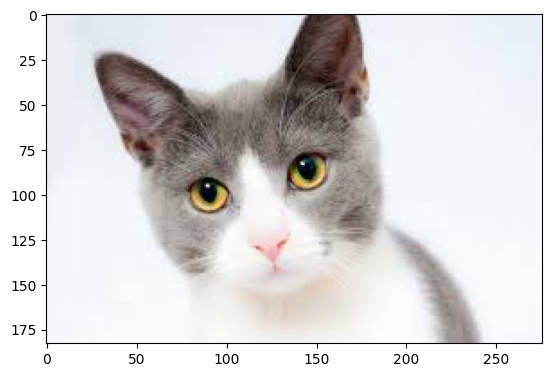

In [20]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.show()

**Séparer les canaux d'une image et visualiser chacun séparément**

In [11]:
b, g, r = cv.split(image)


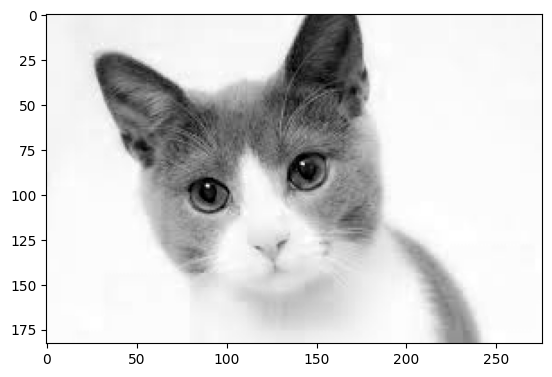

In [22]:
plt.imshow(cv.cvtColor(b, cv.COLOR_BGR2RGB))

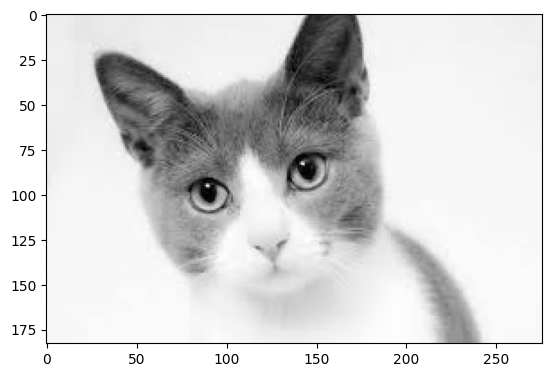

In [23]:
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.show()



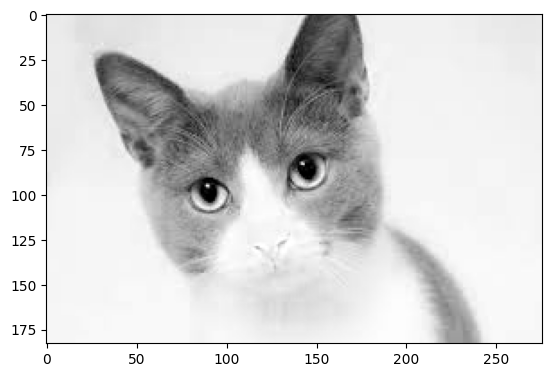

In [24]:
plt.imshow(cv.cvtColor(r, cv.COLOR_BGR2RGB))
plt.show()


**Convertir une image RGB en niveaux de gris, en HSV, en BGR...**


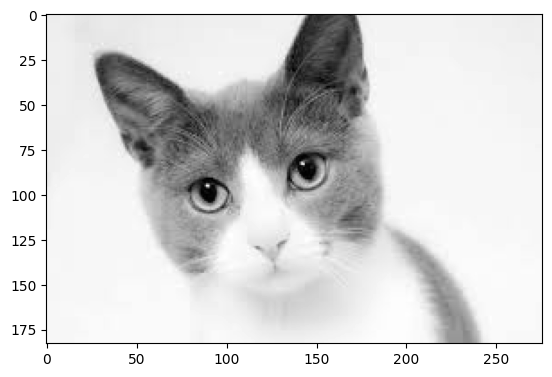

In [27]:
gray_image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

**HSV**

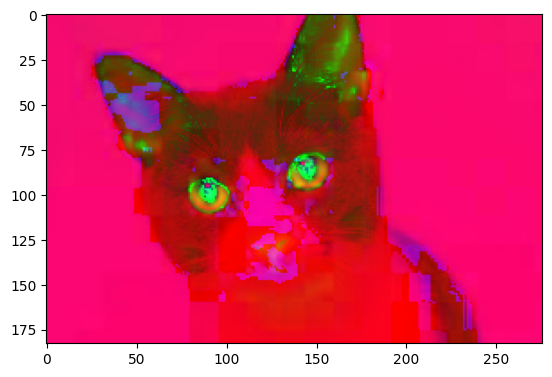

In [29]:
hsv_image=cv.cvtColor(image,cv.COLOR_BGR2HSV)
plt.imshow(cv.cvtColor(hsv_image, cv.COLOR_BGR2RGB))

**Modifier la taille d'une image**

In [30]:
taille_image=image.shape
taille_image

(183, 276, 3)

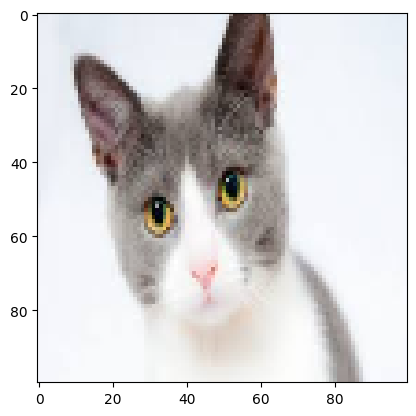

In [32]:
image_resize=cv.resize(image,(100,100))
plt.imshow(cv.cvtColor(image_resize, cv.COLOR_BGR2RGB))


**Faire une rotation d'une image**

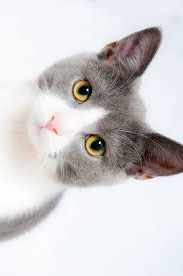

In [ ]:
rotate_image=cv.rotate(image,cv.ROTATE_90_CLOCKWISE)
plt.imshow(cv.cvtColor(rotate_image, cv.COLOR_BGR2RGB))

**Flouter une image avec des filtres Gaussien ou Médian**

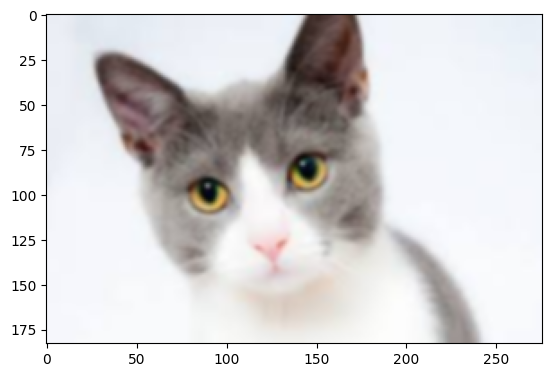

In [33]:
gaussian_image=cv.GaussianBlur(image,(5,5),0)
plt.imshow(cv.cvtColor(gaussian_image, cv.COLOR_BGR2RGB))

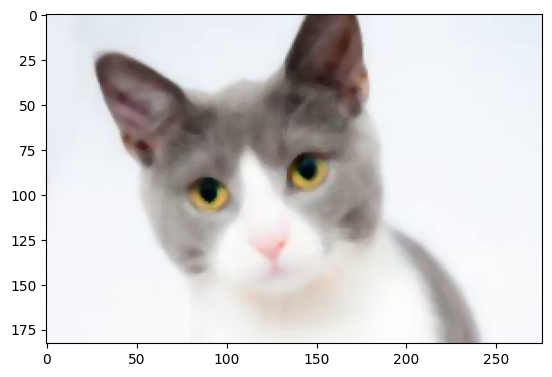

In [34]:
median_image=cv.medianBlur(image,5)
plt.imshow(cv.cvtColor(median_image, cv.COLOR_BGR2RGB))

Ajouter des dessins dans une image, et dans un flux vidéo

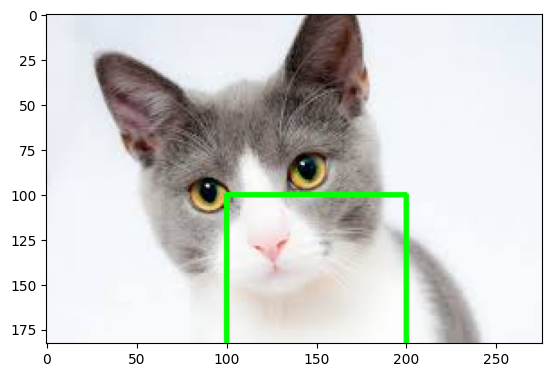

In [35]:

cv.rectangle(image, (100, 100), (200, 200), (0, 255, 0), 2)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

Récupérer une interaction (clic) dans une image ou une vidéo

In [11]:
image = np.zeros((500, 500, 3), dtype="uint8")

cv.rectangle(image, (100, 100), (200, 200), (0, 255, 0), -1)  
cv.rectangle(image, (300, 300), (400, 400), (0, 0, 255), -1)  

def mouse_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        print(f"Clic détecté aux coordonnées : ({x}, {y})")
        if 100 <= x <= 200 and 100 <= y <= 200:
            print("Clic sur le carré vert")
        elif 300 <= x <= 400 and 300 <= y <= 400:
            print("Clic sur le carré rouge")

cv.imshow("Image", image)

cv.setMouseCallback("Image", mouse_callback)

cv.waitKey(0)
cv.destroyAllWindows()

# Partie 2 - Traitement d'images avec OpenCV


**mask**

In [3]:
img=cv.imread('image_chat2.jfif')
ht, wd = img.shape[:2]

# define circle
radius = min(ht,wd)//2
xc = yc = radius

mask = np.zeros((ht,wd), dtype=np.uint8)
mask = cv.circle(mask, (xc,yc), radius, 255, -1)
color = np.full_like(img, (255,0,0))
masked_img = cv.bitwise_and(img, img, mask=mask)
masked_color = cv.bitwise_and(color, color, mask=255-mask)
result = cv.add(masked_img, masked_color)
cv.imwrite('chat.png', mask)
cv.imwrite('chat2.png', result)

cv.imshow('image', img)
cv.imshow('mask', mask)
cv.imshow('masked image', result)
cv.waitKey(0)
cv.destroyAllWindows()

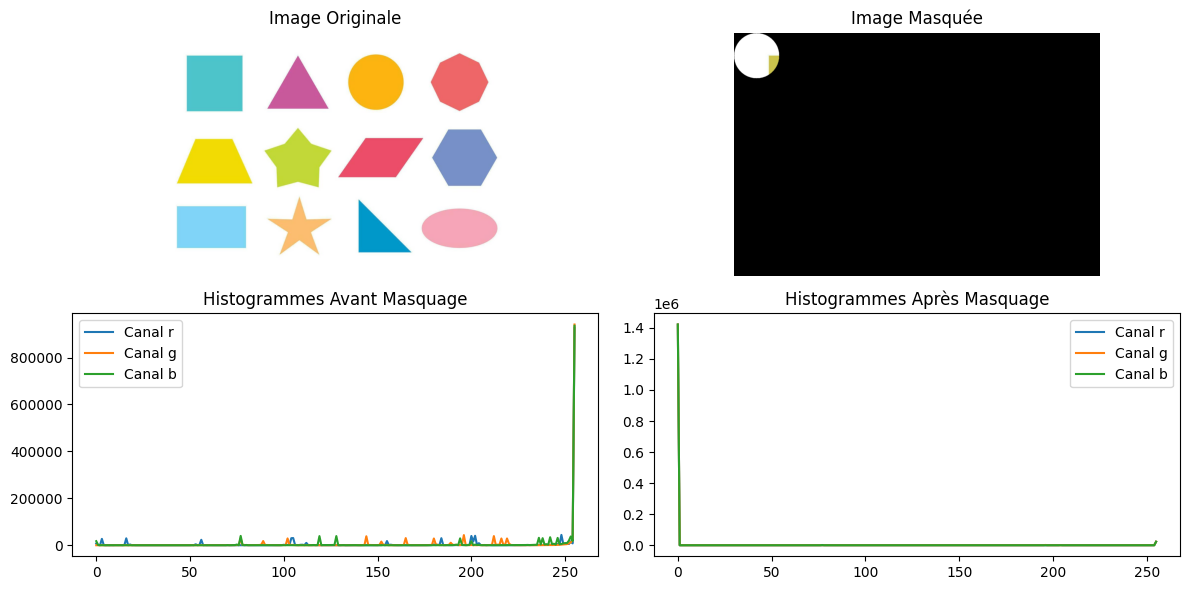

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('test.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2], dtype="uint8")
mask = cv.circle(mask, (xc,yc), radius, 255, -1)

masked_image = cv2.bitwise_and(image, image, mask=mask)

def calculate_histograms(image):
    colors = ('r', 'g', 'b')
    histograms = {}
    for i, color in enumerate(colors):
        histograms[color] = cv2.calcHist([image], [i], None, [256], [0, 256])
    return histograms

histograms_before = calculate_histograms(image)


histograms_after = calculate_histograms(masked_image)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Image Originale")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(masked_image)
plt.title("Image Masquée")
plt.axis("off")

# Afficher les histogrammes
plt.subplot(2, 2, 3)
for color, hist in histograms_before.items():
    plt.plot(hist, label=f'Canal {color}')
plt.title("Histogrammes Avant Masquage")
plt.legend()

plt.subplot(2, 2, 4)
for color, hist in histograms_after.items():
    plt.plot(hist, label=f'Canal {color}')
plt.title("Histogrammes Après Masquage")
plt.legend()

plt.tight_layout()
plt.show()


Détection de contours par gradients : Sobel et Laplacien

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


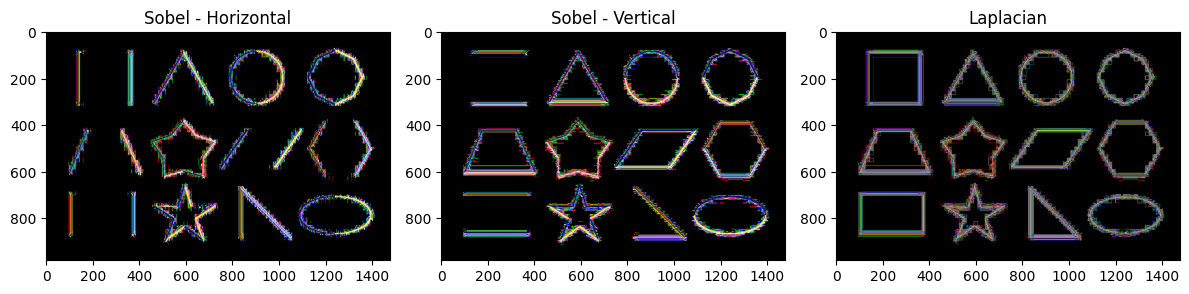

In [ ]:
# Filtrage Sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
sobel_combined = cv2.magnitude(sobelx, sobely) 

# Filtrage Laplacien
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Affichage
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel - Horizontal')

plt.subplot(1, 3, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel - Vertical')

plt.subplot(1, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.tight_layout()
plt.show()


In [1]:
import cv2

# Charger les cascades Haar pour le visage et le sourire
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur lors de la capture de la vidéo")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20, minSize=(25, 25))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)
            cv2.putText(frame, "Sourire detecte!", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Detection de sourires', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [3]:
pip install mediapipe opencv-python --upgrade


  Using cached mediapipe-0.10.20-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached jax-0.4.38-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp312-cp312-win_amd64.whl.metadata (1.1 kB)
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
Using cached mediapipe-0.10.20-cp312-cp312-win_amd64.whl (51.0 MB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.8 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.8 MB 6.7 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.8 MB 6.6 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/38.8 MB 6.6 MB/s eta 0:00:06
   ------ --------------------------------- 6.0/38.8 MB 6.2 MB/s eta 0:00:06
   ------- -------------------------------- 7.1/38.8 MB 5.9 MB/s eta 0:00:06
   -------- -----------------

  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
